In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from simtk import unit
import molsysmt as msm
import openpocket as opp
import nglview as nv
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay, ConvexHull
from scipy.spatial.distance import euclidean as distance

_ColormakerRegistry()

## Índice
- ¿Qué son las alfa-esferas?
- ¿Cómo se clusterizan?

## 2D example

Random compact figure 2D made by hard discs. Adimensional lengths.

In [9]:
radius = 1.0 
n_discs = 20

positions = np.zeros(shape=(n_discs,2),dtype=float)

for ii in range(1, n_discs):
    done = False
    while done is False:
        disc_in_contact = np.random.randint(0,ii)
        angle = 2*np.pi*np.random.random()
        new_center = 2*radius*np.array([np.cos(angle), np.sin(angle)])+positions[disc_in_contact,:]
        done=True
        for jj in range(ii):
            dist= np.linalg.norm(positions[jj,:]-new_center)
            if dist < 2*radius:
                done=False
                break
        if done is True:
            positions[ii,:]=new_center


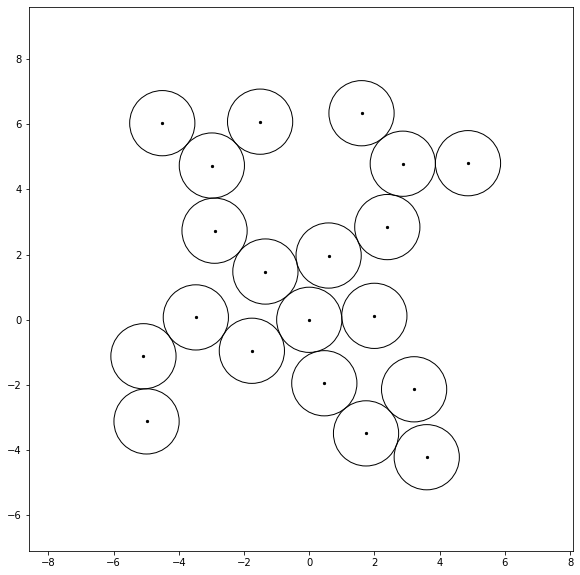

In [10]:
plt.rcParams["figure.figsize"] = (10,10)

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()


### Voronoi diagrams

Voronoi diagrams helps us to geometrically make a first a proach. We can determine those disks in the surface of the molecule and those in the core.

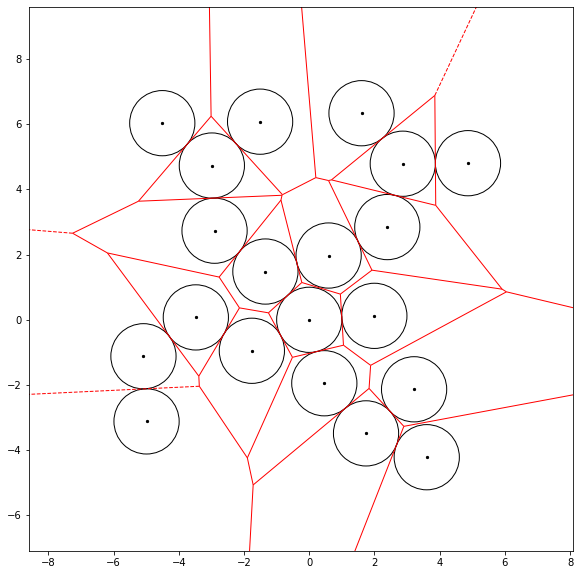

In [13]:
vor = Voronoi(positions, incremental=False)

voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r', s=4)

ax=plt.gca()
for ii in range(n_discs):
    x,y = positions[ii,:]
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

See also:    
https://www.daniweb.com/programming/computer-science/tutorials/520314/how-to-make-quality-voronoi-diagrams    
https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.spatial.Voronoi.html    


## Dellanuy triangulation


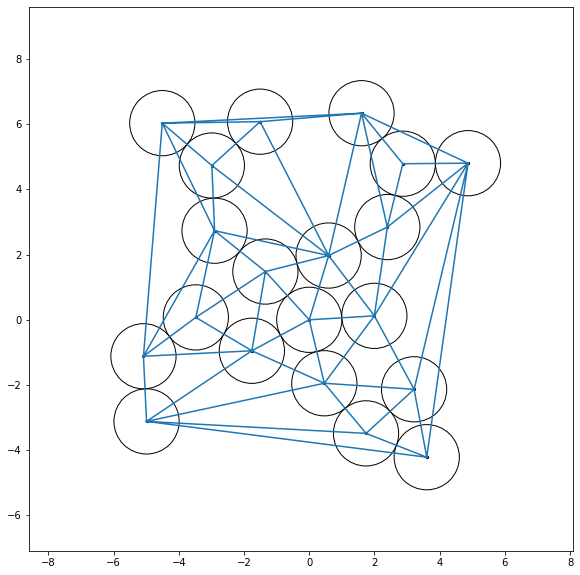

In [14]:
tri = Delaunay(positions)

plt.triplot(positions[:,0], positions[:,1], tri.simplices)

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

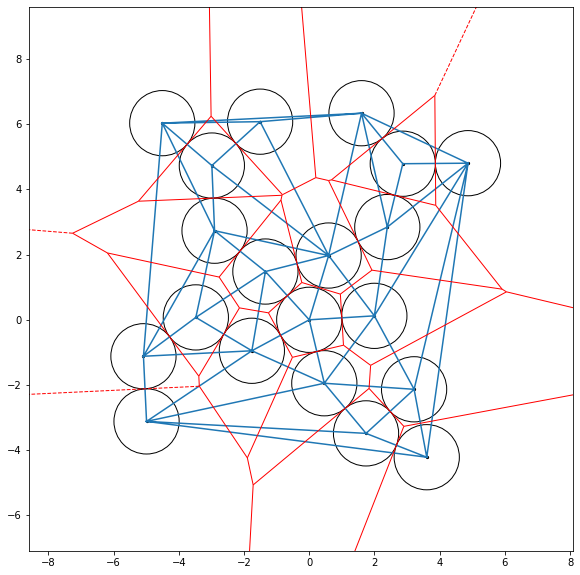

In [15]:
voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r')

plt.triplot(positions[:,0], positions[:,1], tri.simplices)

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

Los vertice de las regiones de Voronoi son los circumcentros de los triangulos de Delanuy. Y las regiones infinitas (con alguno de sus lados infinitos) son precisamente los puntos exteriores en la teselación de Delanuy, cosa que vemos bien si atendemos a la convex hull:

## Convex Hull

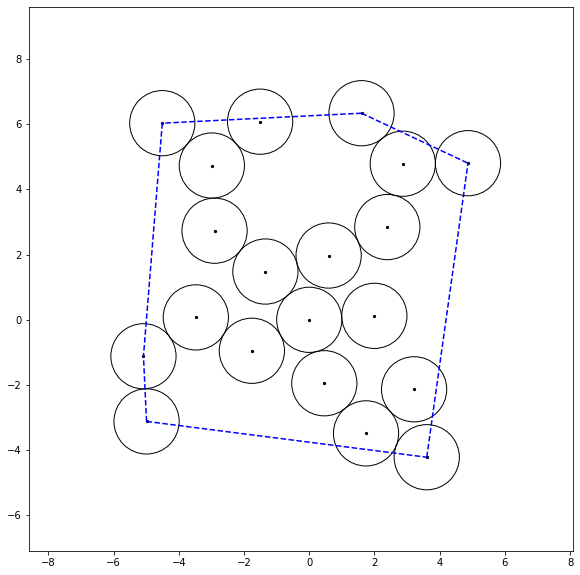

In [16]:
hull = ConvexHull(positions)

for simplex in hull.simplices:
    plt.plot(positions[simplex, 0], positions[simplex, 1], 'b--')

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

## Alpha spheres

Lets see the meaning of voronoi vertices:

In [17]:
vor.vertices

array([[ -2.35229918, -16.64433282],
       [ -7.25747386,   2.65495462],
       [ 14.38529468,  -1.12950507],
       ...,
       [  3.85105795,   6.88070079],
       [  3.87869782,   3.51043291],
       [  0.68116411,   4.29127207]])

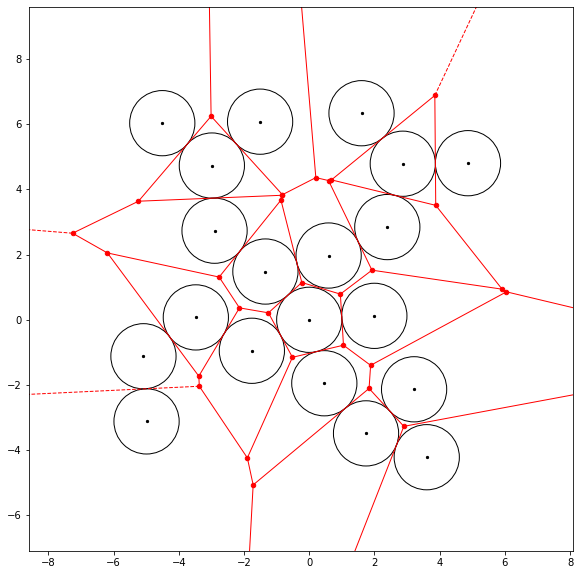

In [18]:
voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r')

plt.scatter(vor.vertices[:,0], vor.vertices[:,1], s=20, c='red')

ax=plt.gca()
for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

Cada vertice está a la misma distancia de tres puntos. Cada vertice esta formado necesariamente por tres celdas adyacentes. Cada una con un centro que estará en la alfa-circunferencia.

In [19]:
vor.vertices

array([[ -2.35229918, -16.64433282],
       [ -7.25747386,   2.65495462],
       [ 14.38529468,  -1.12950507],
       ...,
       [  3.85105795,   6.88070079],
       [  3.87869782,   3.51043291],
       [  0.68116411,   4.29127207]])

In [20]:
vor.regions # cada region está cercada por unos vertices expresados por las siguientes listas

[[],
 [4, 0, -1, 2],
 [8, 4, 0, 7],
 [9, 3, 2, 4, 8],
 [14, 12, 11, 13],
 [17, 10, 1, 12, 14, 16],
 [19, 11, 13, 18],
 [19, 11, 12, 1, -1],
 [21, 5, 6, 9, 3, 20],
 [22, 18, 13, 14, 16, 15, 5, 21],
 [28, 25, 24, 23, 26, 27],
 [26, 6, 9, 8, 7, 23],
 [24, -1, 0, 7, 23],
 [25, 10, 1, -1, 24],
 [28, 17, 10, 25],
 [27, 15, 5, 6, 26],
 [28, 17, 16, 15, 27],
 [31, 29, 30],
 [31, 22, 18, 19, -1, 29],
 [30, 20, 3, 2, -1, 29],
 [31, 22, 21, 20, 30]]

In [21]:
vor.point_region

array([15, 11, 10, ..., 12,  6,  7])

In [22]:
n_vertices = vor.vertices.shape[0]
n_regions = len(vor.regions)
n_points = vor.npoints

points_of_vertex = [[] for ii in range(n_vertices)]
region_point={vor.point_region[ii]:ii for ii in range(n_points)}

for region_index in range(n_regions):
    region=vor.regions[region_index]
    if len(region)>0:
        point_index=region_point[region_index]
        for vertex_index in region:
            if vertex_index != -1:
                points_of_vertex[vertex_index].append(point_index)

In [23]:
points_of_vertex

[[12, 10, 17],
 [7, 19, 11],
 [12, 15, 14],
 [15, 8, 14],
 [12, 10, 15],
 [8, 4, 0],
 [8, 1, 0],
 [10, 1, 17],
 [10, 15, 1],
 [15, 8, 1],
 [7, 11, 9],
 [13, 18, 19],
 [13, 7, 19],
 [13, 18, 4],
 [13, 7, 4],
 [4, 0, 3],
 [7, 4, 3],
 [7, 9, 3],
 [18, 4, 16],
 [18, 19, 16],
 [8, 14, 5],
 [8, 4, 5],
 [4, 16, 5],
 [2, 1, 17],
 [2, 17, 11],
 [2, 11, 9],
 [2, 1, 0],
 [2, 0, 3],
 [2, 9, 3],
 [6, 16, 14],
 [6, 14, 5],
 [6, 16, 5]]

In [24]:
vor.ridge_dict

{(12, 14): [-1, 2],
 (12, 17): [-1, 0],
 (12, 10): [0, 4],
 (12, 15): [2, 4],
 (10, 17): [0, 7],
 (10, 15): [4, 8],
 (10, 1): [7, 8],
 (15, 14): [2, 3],
 (15, 8): [3, 9],
 (15, 1): [8, 9],
 (13, 19): [11, 12],
 (13, 18): [11, 13],
 (13, 7): [12, 14],
 (13, 4): [13, 14],
 (7, 19): [1, 12],
 (7, 11): [1, 10],
 (7, 9): [10, 17],
 (7, 4): [14, 16],
 (7, 3): [16, 17],
 (18, 19): [11, 19],
 (18, 4): [13, 18],
 (18, 16): [18, 19],
 (19, 11): [-1, 1],
 (19, 16): [-1, 19],
 (8, 14): [3, 20],
 (8, 4): [5, 21],
 (8, 0): [5, 6],
 (8, 1): [6, 9],
 (8, 5): [20, 21],
 (4, 0): [5, 15],
 (4, 3): [15, 16],
 (4, 16): [18, 22],
 (4, 5): [21, 22],
 (2, 1): [23, 26],
 (2, 17): [23, 24],
 (2, 11): [24, 25],
 (2, 9): [25, 28],
 (2, 0): [26, 27],
 (2, 3): [27, 28],
 (1, 0): [6, 26],
 (1, 17): [7, 23],
 (17, 11): [-1, 24],
 (11, 9): [10, 25],
 (9, 3): [17, 28],
 (0, 3): [15, 27],
 (6, 16): [29, 31],
 (6, 14): [29, 30],
 (6, 5): [30, 31],
 (16, 14): [-1, 29],
 (16, 5): [22, 31],
 (14, 5): [20, 30]}

In [25]:
n_alpha_circles = n_vertices
alpha_circle_centers = vor.vertices
alpha_circle_radius = [distance(vor.vertices[ii], positions[points_of_vertex[ii][0]]) for ii in range(n_vertices)]
alpha_circle_contacted_points = points_of_vertex

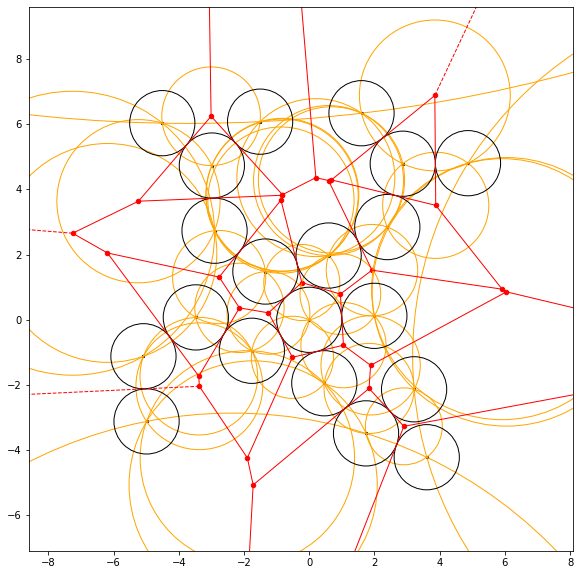

In [26]:
voronoi_plot_2d(vor, show_points=False, show_vertices=False, line_colors='r')

plt.scatter(vor.vertices[:,0], vor.vertices[:,1], s=20, c='red')

ax=plt.gca()

for ii in range(n_alpha_circles):
    ax.add_patch(plt.Circle(alpha_circle_centers[ii,:], radius= alpha_circle_radius[ii], color='orange', fill=False))

for ii in range(n_discs):
    ax.add_patch(plt.Circle(positions[ii,:], radius= radius, color='k', fill=False))

plt.scatter(positions[:,0], positions[:,1], s=5, c='k')

l_box = np.abs(positions).max() + 2*radius
center = positions.mean(0)
plt.axis('scaled')
plt.xlim(-l_box+center[0],l_box+center[0])
plt.ylim(-l_box+center[1],l_box+center[1])
plt.show()

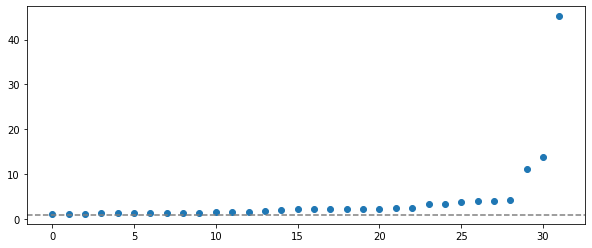

In [27]:
plt.rcParams["figure.figsize"] = (10,4)
plt.scatter(range(n_alpha_circles), np.sort(alpha_circle_radius))
plt.axhline(y=1, color='gray', linestyle='--')

## Notes
- What if the sphere radius are different? Repeat this with 4 classes of discs (4 different radius)
- The cavities need to allocate something inside. There is no reason to work with aisolated spheres of radius smaller than a disc (atom)

## 3D Alpha Spheres with OpenPocket

Lets define 4 points in space:

In [28]:
positions = np.zeros(shape=(4,3),dtype=float) * unit.angstroms

positions[0,:] = [-1.0, 2.0, 0.0] * unit.angstroms
positions[1,:] = [0.0, 2.0, 1.0] * unit.angstroms
positions[2,:] = [1.0, -2.0, 1.0] * unit.angstroms
positions[3,:] = [0.0, 1.0, 1.0] * unit.angstroms

We can obtain the set of alpha spheres defined by the coordinates of those 4 points. With the class `AlphSpheresSet` we can instance an object given an array of 3D coordinates:

In [29]:
alpha_spheres_set = opp.alpha_spheres.AlphaSpheresSet(positions)

The new object has some useful methods and attributes regarding the resultant alpha-spheres set. Lets check, for instance, the number of alpha spheres obtained with our 4 points:

In [30]:
alpha_spheres_set.n_alpha_spheres

1

As expected, there is only one alpha sphere. Lets print out now the center and radius of the first and unique alpha sphere of the set:

In [31]:
print('The only alpha-sphere has its center in {} and a radius of {} length.'.format(
    alpha_spheres_set.centers[0], alpha_spheres_set.radii[0]))

The only alpha-sphere has its center in [ 6.5  1.5 -6.5] A and a radius of 9.937303457175895 A length.


We can also wonder what points of the input points distribution are in contact with an specific alpha sphere of the set. In this case is trivial, since there is only 4 points and 1 alpha sphere:

In [32]:
alpha_spheres_set.points_of_alpha_sphere[0]

array([0, 1, 2, 3])

At last, lets see the sphere and the 4 points in a spatial representation:

In [33]:
view = nv.NGLWidget()

for index in range(alpha_spheres_set.n_points):
    atom_coordinates = alpha_spheres_set.points[index,:]._value
    view.shape.add_sphere(list(atom_coordinates), [0.8,0.0,0.0], 0.2)

for index in range(alpha_spheres_set.n_alpha_spheres):
    sphere_coordinates = alpha_spheres_set.centers[index,:]._value
    sphere_radius = alpha_spheres_set.radii[index]._value
    view.shape.add_sphere(list(sphere_coordinates), [0.8,0.8,0.8], sphere_radius)
    
view

NGLWidget()

As we already knew, 4 points define a single alpha sphere by construction. Lets increase the number of points to 6 to see what happens:

In [34]:
positions = np.zeros(shape=(6,3),dtype=float) * unit.angstroms

positions[0,:] = [-1.0, 2.0, 0.0] * unit.angstroms
positions[1,:] = [0.0, 2.0, 1.0] * unit.angstroms
positions[2,:] = [1.0, -2.0, 1.0] * unit.angstroms
positions[3,:] = [0.0, 1.0, 1.0] * unit.angstroms
positions[4,:] = [0.0, 0.0, 0.0] * unit.angstroms
positions[5,:] = [-1.0, -1.0, 0.0] * unit.angstroms

In [35]:
positions

Quantity(value=array([[-1.,  2.,  0.],
       [ 0.,  2.,  1.],
       [ 1., -2.,  1.],
       [ 0.,  1.,  1.],
       [ 0.,  0.,  0.],
       [-1., -1.,  0.]]), unit=angstrom)

In [36]:
alpha_spheres_set = opp.alpha_spheres.AlphaSpheresSet(positions)

In [37]:
alpha_spheres_set.n_alpha_spheres

4

Now we have 4 alpha spheres. We can check centers and radii:

In [38]:
alpha_spheres_set.centers

Quantity(value=array([[ 6.5 ,  1.5 , -0.5 ],
       [-0.25, -0.75,  1.75],
       [ 0.5 ,  1.5 , -0.5 ],
       [-1.5 ,  0.5 ,  0.5 ]]), unit=angstrom)

In [39]:
alpha_spheres_set.radii

Quantity(value=array([6.68954408, 1.92028644, 1.6583124 , 1.6583124 ]), unit=angstrom)

Lets visualize the points and resultant alpha spheres:

In [40]:
alpha_spheres_set.view()

NGLWidget()

We can also visualize only a list of alpha sphere indices with their corresponding points in contact

In [ ]:
alpha_spheres_set.view([1,3])

What are the indices of the points shown in the above figure? What are the indices of the points in the surface of alpha spheres 1th and 3th?

In [ ]:
alpha_spheres_set.get_points_of_alpha_spheres([1,3])